In [1]:
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf

from urllib.request import urlopen
from mpl_toolkits.basemap import Basemap

# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

In [2]:
workSpace = {'literacy': {'link': 'SE.ADT.LITR.FE.ZS'},
             'mortality': {'link': 'SH.DYN.MORT'},
             'gini': {'link': 'SI.POV.GINI'}}

countries = ['TUR','GRC','BGR','POL','ROU','SYR','IRN']

for x,y in workSpace.items():
    link = y['link']
    y.update({'data': wb.data.DataFrame(link,economy = countries)})

<AxesSubplot:title={'center':'Literacy of Women over 15 for Turkey'}>

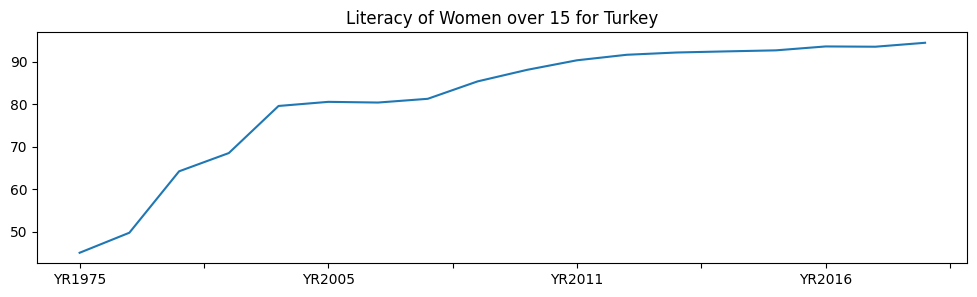

In [3]:
workSpace['literacy']['data'].loc['TUR',:].dropna().plot(figsize=(12,3),title='Literacy of Women over 15 for Turkey')

<AxesSubplot:title={'center':'Mortality Rate of Children per 1000 births for Turkey'}>

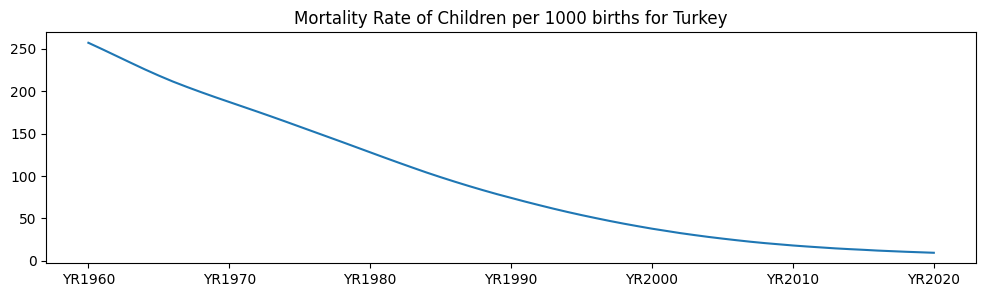

In [4]:
workSpace['mortality']['data'].loc['TUR',:].dropna().plot(figsize=(12,3),title='Mortality Rate of Children per 1000 births for Turkey')

<AxesSubplot:title={'center':'Gini Index for Turkey'}>

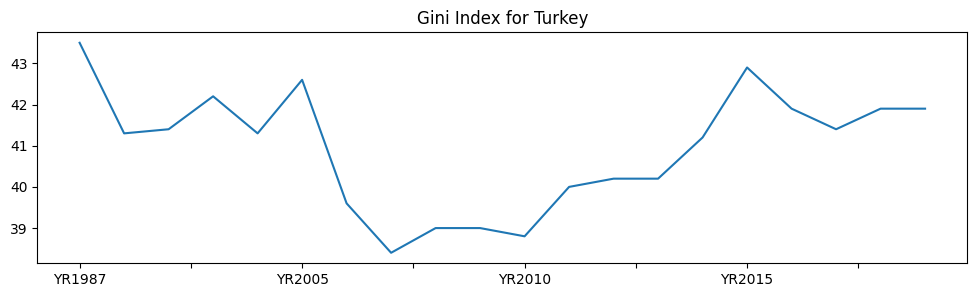

In [5]:
workSpace['gini']['data'].loc['TUR',:].dropna().plot(figsize=(12,3),title='Gini Index for Turkey')

<AxesSubplot:title={'center':'Literacy'}>

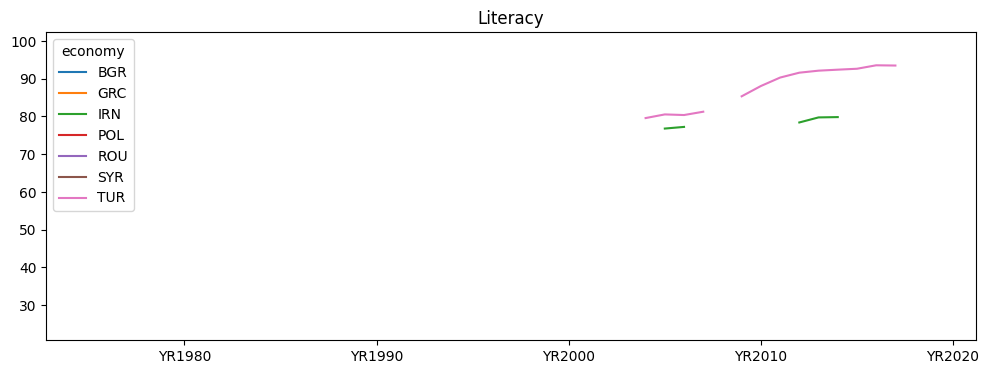

In [6]:
workSpace['literacy']['data'].transpose().plot(figsize=(12,4),title='Literacy')

<AxesSubplot:title={'center':'Mortality Rate'}>

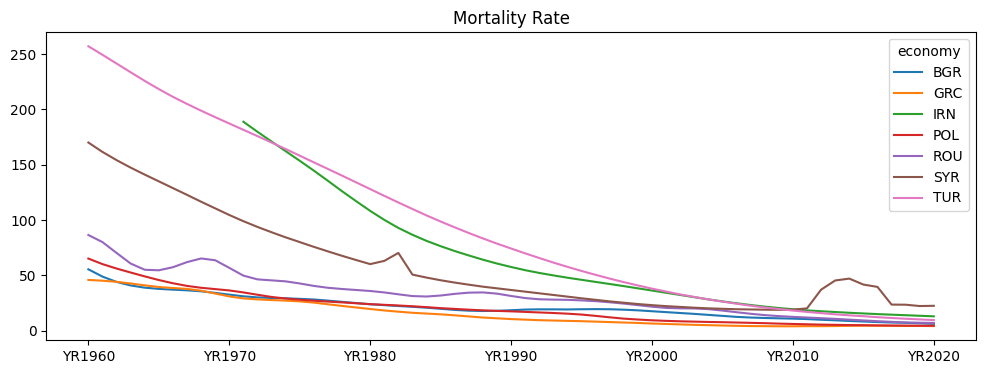

In [7]:
workSpace['mortality']['data'].transpose().plot(figsize=(12,4),title='Mortality Rate')

<AxesSubplot:title={'center':'Gini'}>

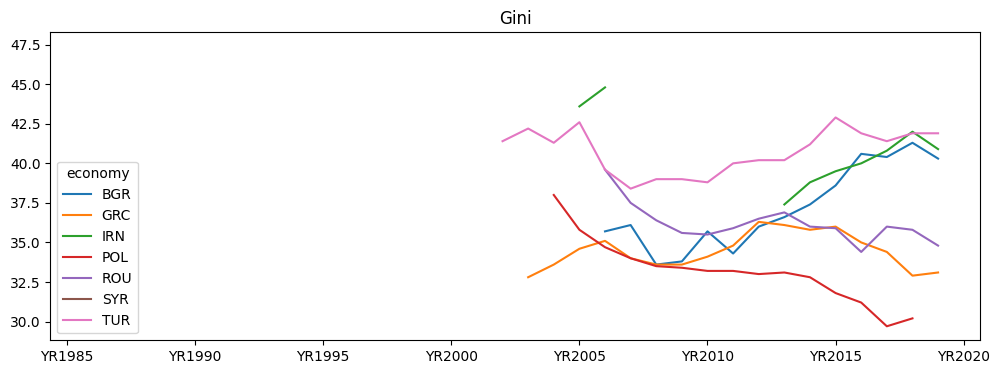

In [8]:
workSpace['gini']['data'].transpose().plot(figsize=(12,4),title='Gini')

In [9]:
def plotXvsY(c1,c2,cntry):
    tmp = pd.DataFrame({c1: workSpace[c1]['data'].loc[cntry,:],
                        c2: workSpace[c2]['data'].loc[cntry,:]}).dropna()
    plt.scatter(tmp[c1],tmp[c2])

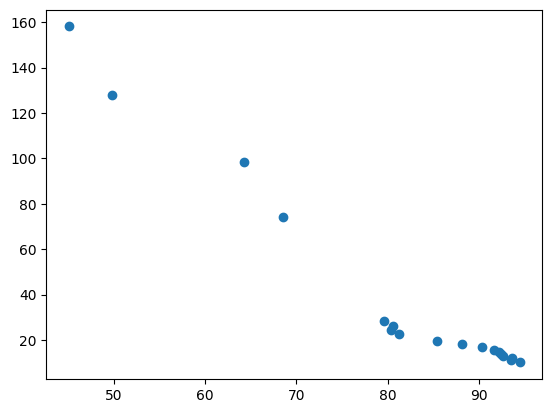

In [10]:
plotXvsY('literacy','mortality','TUR')

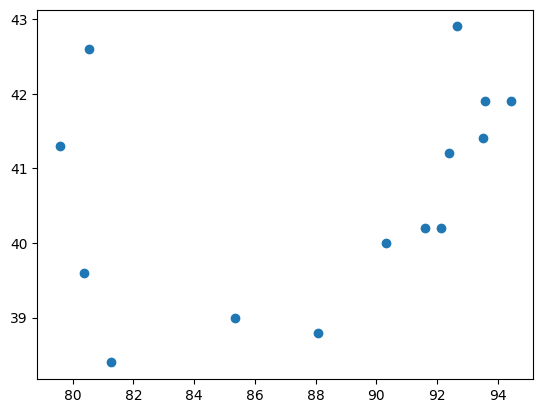

In [11]:
plotXvsY('literacy','gini','TUR')

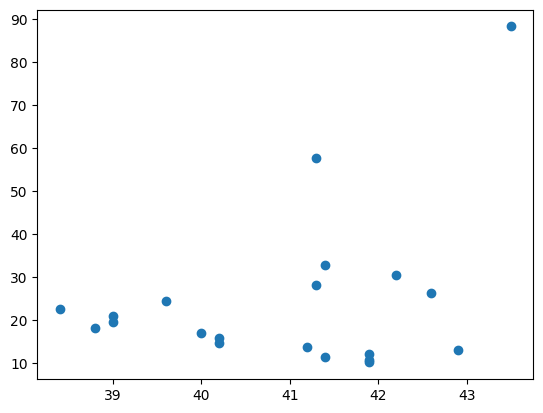

In [12]:
plotXvsY('gini','mortality','TUR')

## Question 2

DataFramee Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

In [13]:
def helper(x):
    return float(f'{x[:2]}.{x[2:]}')

ibb = pd.read_csv('https://data.ibb.gov.tr/datastore/dump/7aec630d-2757-4da0-97f1-71b140abd818',
                  encoding='utf8',
                  delimiter=',',
                  converters={'lattitude': helper,
                              'longitude': helper})
ibb

,_id,PASSAGE_COUNT,PASSENGER_COUNT,transaction_Month,transaction_Year,GENDER,LINE,STATION_NAME,STATION_NUMBER,TOWN,LATITUDE,LONGITUDE,age_group
0,1,24918,10204,1,2019,1,AKSARAY-HAVALİMANI,AKSARAY,AKE-AKS,Fatih,41.011833,28.947889,60+
1,2,5584,2808,1,2019,2,AKSARAY-HAVALİMANI,AKSARAY,AKE-AKS,Fatih,41.011833,28.947889,60+
2,3,21688,8198,1,2019,1,AKSARAY-HAVALİMANI,AKSARAY 1,AKE-EMN,Fatih,41.011833,28.947889,30-60
3,4,5220,1967,1,2019,1,AKSARAY-HAVALİMANI,AKSARAY 1,AKE-EMN,Fatih,41.011833,28.947889,<20
4,5,3161,1589,1,2019,2,AKSARAY-HAVALİMANI,AKSARAY 1,AKE-EMN,Fatih,41.011833,28.947889,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46105,46106,103,62,12,2020,2,İETT NOSTALJİK TRAMVAY,NaN,NaN,Beyoğlu,NaN,NaN,60+
46106,46107,25,21,12,2020,2,İETT NOSTALJİK TRAMVAY,NaN,NaN,Beyoğlu,NaN,NaN,<20
46107,46108,5298,2942,12,2020,2,İETT TÜNEL,Karaköy,KAR-TKK,Beyoğlu,41.022806,28.974083,20-30
46108,46109,6290,2949,12,2020,2,İETT TÜNEL,Karaköy,KAR-TKK,Beyoğlu,41.022806,28.974083,30-60


In [14]:
pc = ibb[['PASSENGER_COUNT','STATION_NAME','LATITUDE','LONGITUDE']].groupby('STATION_NAME').agg({'PASSENGER_COUNT': sum,
                                                                                                 'STATION_NAME': 'first',
                                                                                                 'LATITUDE': 'first',
                                                                                                 'LONGITUDE': 'first'})
pc

,PASSENGER_COUNT,STATION_NAME,LATITUDE,LONGITUDE
STATION_NAME,,,,
4 Levent 2 Güney,1464498,4 Levent 2 Güney,41.085722,29.006861
4 Levent Kuzey,1821355,4 Levent Kuzey,41.085722,29.006861
AKSARAY,1873032,AKSARAY,41.011833,28.947889
AKSARAY 1,804448,AKSARAY 1,41.011833,28.947889
ALTINŞEHİR,522763,ALTINŞEHİR,41.016694,29.140111
...,...,...,...,...
Şehitlik,1814787,Şehitlik,41.034278,28.928333
Şişhane Güney,1185692,Şişhane Güney,41.028722,28.974889
Şişhane Kuzey,1738115,Şişhane Kuzey,41.028722,28.974889


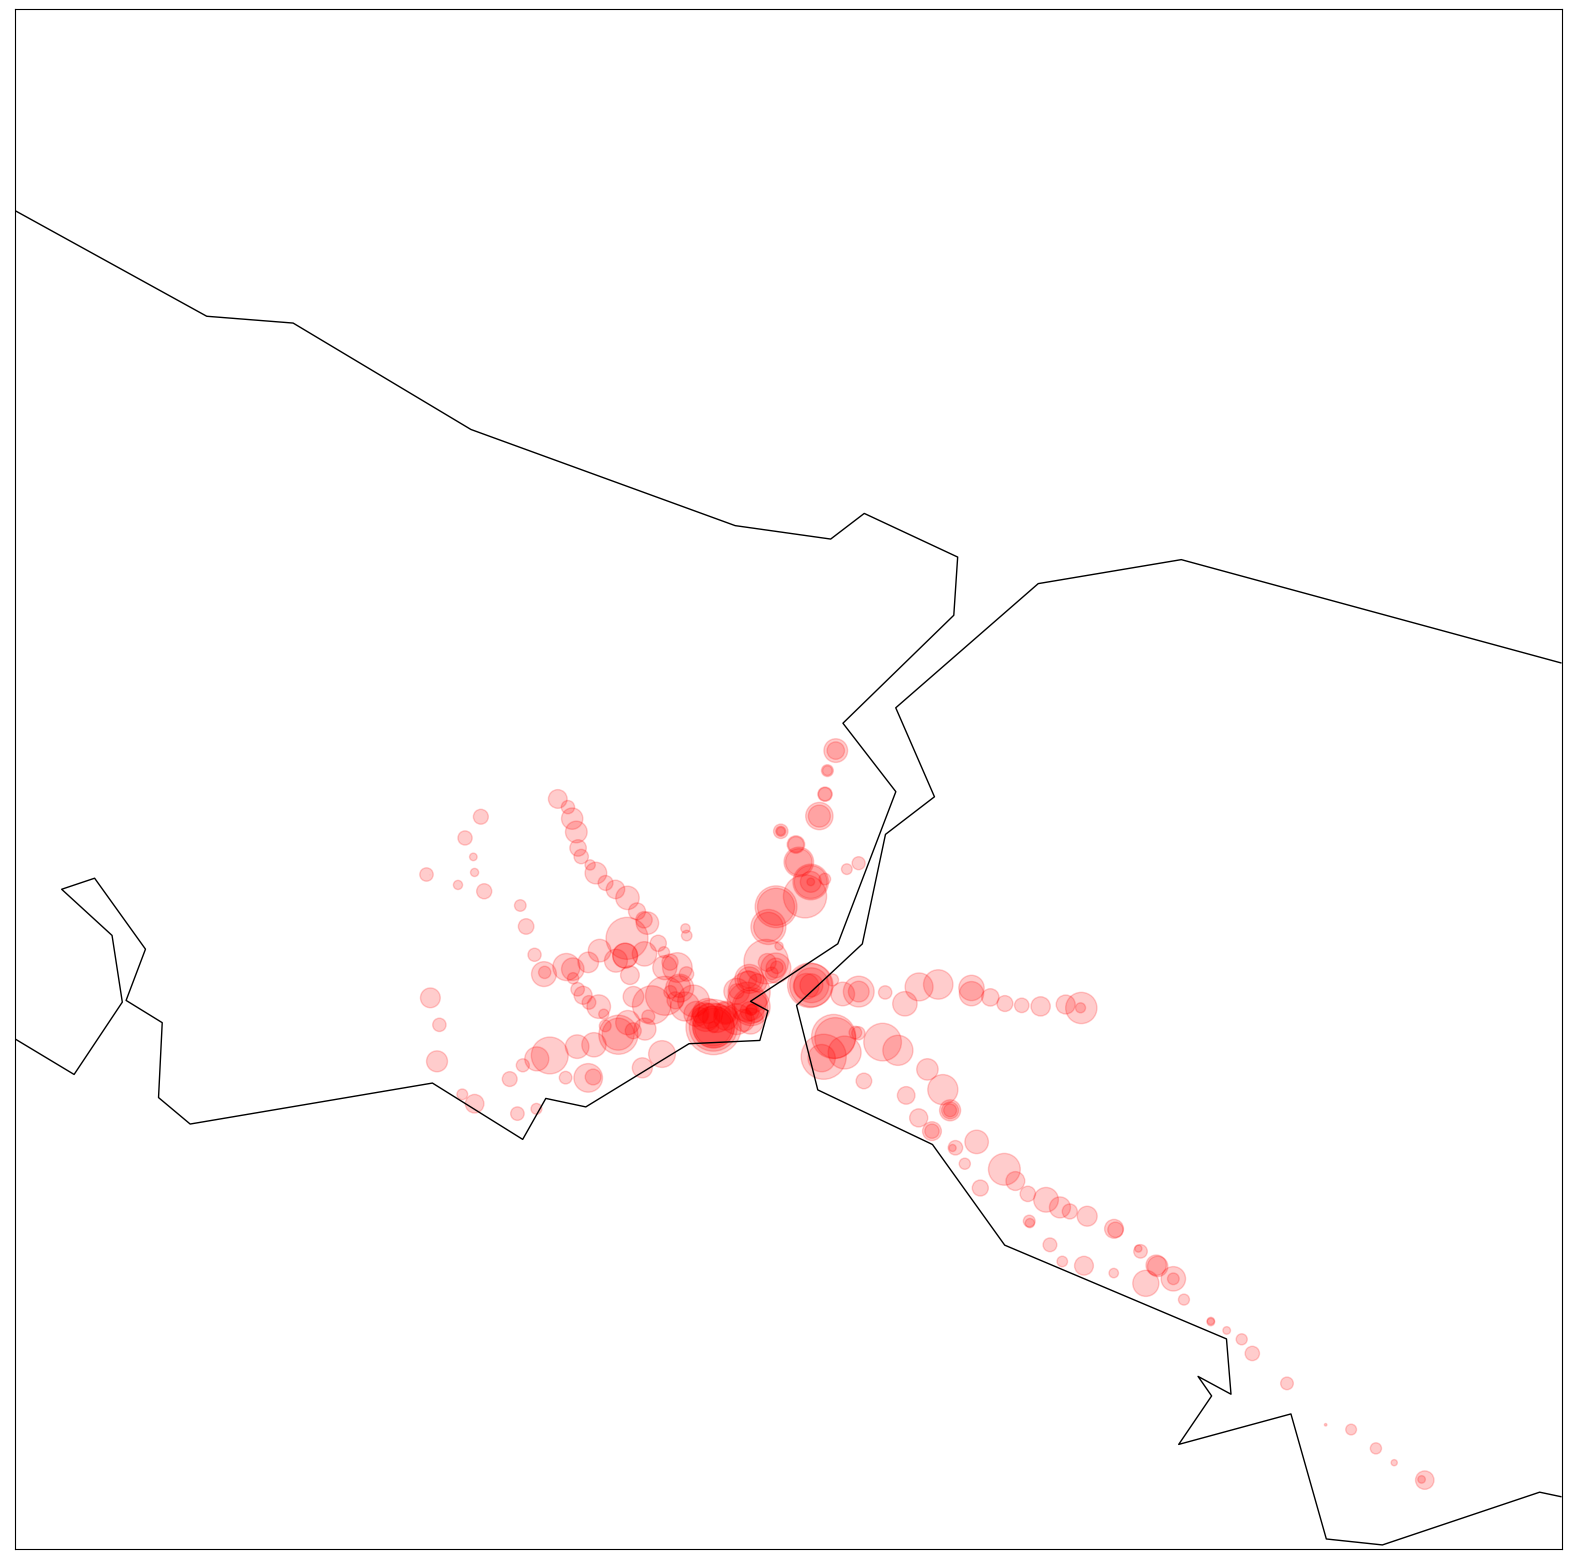

In [15]:
fig = plt.figure(figsize=(20,20))

m = Basemap(projection='merc',
           llcrnrlat = 40.75,
           urcrnrlat = 41.50,
           llcrnrlon = 28.5,
           urcrnrlon = 29.5,
           resolution='i')

m.drawcoastlines()
xs,ys = m( pc['LONGITUDE'],pc['LATITUDE'])
m.scatter(xs, ys, s=pc['PASSENGER_COUNT']/4e3, c='red', alpha=0.2)
plt.show()

In [16]:
def prob(age):
    tmp = ibb[ibb['age_group']==age][['STATION_NAME','PASSENGER_COUNT']]
    tmp['probability'] = tmp['PASSENGER_COUNT']/tmp['PASSENGER_COUNT'].sum()
    return dict(zip(tmp['STATION_NAME'],tmp['probability']))

In [17]:
prob('60+')

{'AKSARAY': 2.7885336786123276e-05,
 'AKSARAY 1': 1.1618890327551365e-05,
 'BAHCELIEVLER': 0.00011480109137527834,
 'BAYRAMPASA': 4.3764486900443476e-05,
 'DAVUTPASA': 4.276397134445989e-05,
 'EMNIYET': 5.225273177862683e-05,
 'ESENLER': 4.0214270411469446e-05,
 'IDTM': 9.87605677841866e-06,
 'MERTER': 3.456619872446531e-05,
 'OTOGAR': 4.76697250383149e-05,
 'SAGMALCILAR': 3.753547069706177e-05,
 'YENIKAPI': 6.922922153499355e-05,
 'ZEYTINBURNU': 0.00033155794537481994,
 'Bereç': 8.982047717104292e-05,
 'Cumhuriyet': 2.1333573629198477e-05,
 'Edirnekapı': 2.1107650761718313e-05,
 'Fetihkapı': 3.5728087757220443e-05,
 'Metris': 5.028397536201396e-05,
 'Sultançiftliği': 4.9767580236345014e-05,
 'Vatan': 5.702938669106462e-05,
 'Çukurçeşme': 1.6363270544634837e-05,
 'Akşemsettin': 5.7545781816733564e-05,
 'Atatürk Öğrenci Yurdu': 0.00016831253627272325,
 'Bağcılar': 2.510971298565267e-05,
 'Beyazıt': 0.00016098618042729502,
 'Cami': 1.778335714022445e-05,
 'Eminönü 2': 0.00010221396018709

In [18]:
res = {}
for x in ['<20', '20-30', '30-60', '60+']:
    try:
        tmp = prob(x)
        res.update({x: max(tmp, key=tmp.get)})
    except:
        continue
res

{'<20': 'YENIKAPI',
 '20-30': 'Taksim Güney',
 '30-60': 'Yenikapı Kuzey',
 '60+': 'Ayrılıkçeşme'}

# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

In [23]:
finance = yf.download(['MSFT','AAPL','NDX'],start='2000-01-01')

[*********************100%***********************]  3 of 3 completed


In [24]:
logReturn = np.log(finance['Adj Close']).diff()
logReturn

,AAPL,MSFT,NDX
Date,,,
1999-12-31,NaN,NaN,NaN
2000-01-03,0.085033,-0.001607,0.022064
2000-01-04,-0.088077,-0.034364,-0.066635
2000-01-05,0.014527,0.010489,-0.011027
2000-01-06,-0.090514,-0.034072,-0.048636
...,...,...,...
2022-10-17,0.028707,0.038495,0.034062
2022-10-18,0.009365,0.004075,0.007673
2022-10-19,0.000765,-0.008506,-0.003987


<AxesSubplot:ylabel='Frequency'>

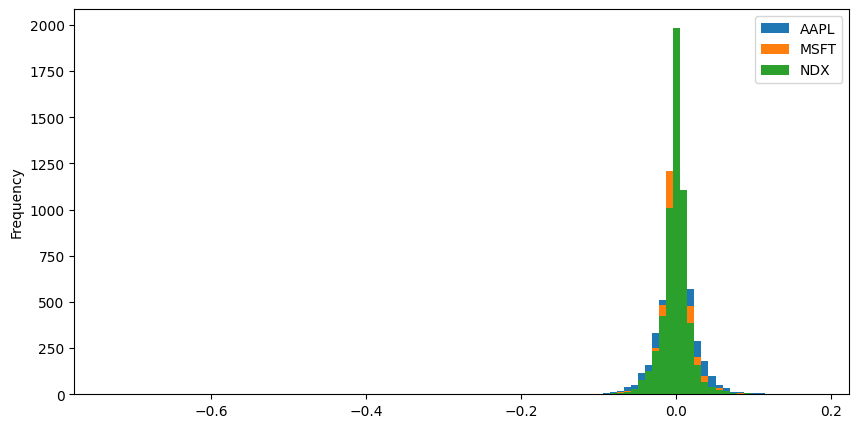

In [41]:
logReturn.plot.hist(bins=100,figsize=(10,5))

<AxesSubplot:xlabel='Date'>

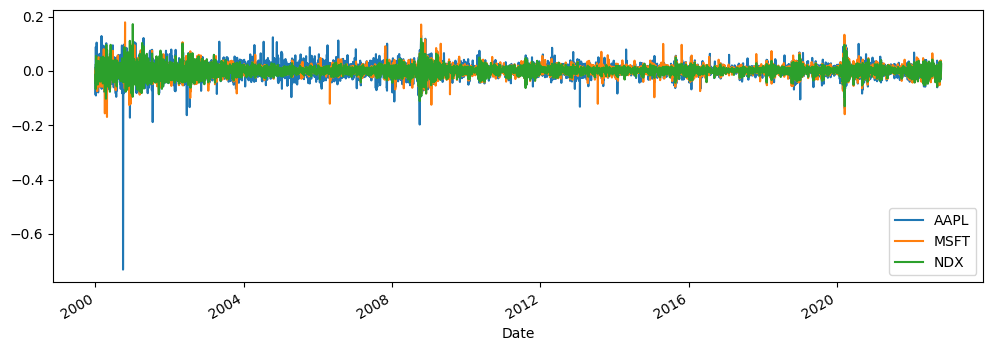

In [25]:
logReturn.plot(figsize=(12,4))

In [26]:
logReturn.corr()

,AAPL,MSFT,NDX
AAPL,1.000000,0.461724,0.648175
MSFT,0.461724,1.000000,0.747405
NDX,0.648175,0.747405,1.000000


In [45]:
from scipy.stats import ttest_rel
logReturn.dropna(inplace=True)

In [56]:
ttest_rel(logReturn['AAPL'],logReturn['MSFT'],alternative='greater')

Ttest_relResult(statistic=1.823566632636784, pvalue=0.03413480584036505)

In [65]:
ttest_rel(logReturn['AAPL'],logReturn['NDX'],alternative='greater')

Ttest_relResult(statistic=2.7405793930480957, pvalue=0.0030760381409551695)

In [63]:
ttest_rel(logReturn['MSFT'],logReturn['NDX'],alternative='greater')

Ttest_relResult(statistic=0.7711770326756237, pvalue=0.22031687992907645)

In [66]:
?ttest_rel

Signature: ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided')
Docstring:
Calculate the t-test on TWO RELATED samples of scores, a and b.

This is a test for the null hypothesis that two related or
repeated samples have identical average (expected) values.

Parameters
----------
a, b : array_like
    The arrays must have the same shape.
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignoring nan values
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis.
    The following options are available (default is 'two-sided'):

    * 'two-sided': the means of the distributions u